#Instalação da biblioteca

In [412]:
!pip install pandas

## Importação das bibliotecas

In [413]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

## Leitura da base

In [414]:
base = pd.read_csv('State of Data 2023 atributos selecionados.csv')
base.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vê o tipo de dado de cada coluna

In [ ]:
base.info()

Verificar a quantidade de valores nulos em cada atributo

In [418]:
for col in base.columns:
    nulos = base[col].isnull().sum()
    print(f'numero de valores nulos na coluna {col} é: {nulos}')

numero de valores nulos na coluna Idade é: 0
numero de valores nulos na coluna Genero é: 0
numero de valores nulos na coluna Cor/raca/etnia é: 0
numero de valores nulos na coluna PCD é: 0
numero de valores nulos na coluna Oportunidade de Progressão de Carreira é: 4048
numero de valores nulos na coluna UF é: 124
numero de valores nulos na coluna Regiao onde mora é: 124
numero de valores nulos na coluna Nivel de Ensino é: 0
numero de valores nulos na coluna Area de Formação é: 113
numero de valores nulos na coluna Situação atual de Trabalho é: 0
numero de valores nulos na coluna Setor é: 540
numero de valores nulos na coluna Cargo é: 1436
numero de valores nulos na coluna Nivel é: 1436
numero de valores nulos na coluna Forma de Trabalho é: 540
numero de valores nulos na coluna Atuação é: 0


### Retirada de linhas com valores nulos nos atributos selecionado abaixo

In [419]:
base.dropna(subset=['Oportunidade de Progressão de Carreira', 'Regiao onde mora', 'UF', 'Setor', 'Forma de Trabalho', 'Cargo', 'Nivel'], inplace=True)

<ipython-input-419-73ea4b6e9fa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.dropna(subset=['Oportunidade de Progressão de Carreira', 'Regiao onde mora', 'UF', 'Setor', 'Forma de Trabalho', 'Cargo', 'Nivel'], inplace=True)


### Verificar a moda de cada atributo

In [420]:
for col in base.columns:
    mode_value = base[col].mode()
    print(f'A moda da coluna {col} é: {mode_value.iloc[0]}')

A moda da coluna Idade é: 27
A moda da coluna Genero é: Feminino
A moda da coluna Cor/raca/etnia é: Branca
A moda da coluna PCD é: Não
A moda da coluna Oportunidade de Progressão de Carreira é: 0.0
A moda da coluna UF é: SP
A moda da coluna Regiao onde mora é: Sudeste
A moda da coluna Nivel de Ensino é: Graduação/Bacharelado
A moda da coluna Area de Formação é: Computação / Engenharia de Software / Sistemas de Informação/ TI
A moda da coluna Situação atual de Trabalho é: Empregado (CLT)
A moda da coluna Setor é: Finanças ou Bancos
A moda da coluna Cargo é: Analista de Dados/Data Analyst
A moda da coluna Nivel é: Pleno
A moda da coluna Forma de Trabalho é: Modelo 100% remoto
A moda da coluna Atuação é: Análise de Dados


Inputação de valor da moda na coluna "Área de Formação

In [421]:
base['Area de Formação'].fillna(value='Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)

<ipython-input-421-2562e2fceeb6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Area de Formação'].fillna(value='Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)
<ipython-input-421-2562e2fceeb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Area de Formação'].fillna(value='Computação / Engenhari

Modificação do tipo da coluna "Oportunidade de Progressão de Carreira" para int

In [424]:
base['Oportunidade de Progressão de Carreira'] = base['Oportunidade de Progressão de Carreira'].astype(int)

<ipython-input-424-f12261718ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Oportunidade de Progressão de Carreira'] = base['Oportunidade de Progressão de Carreira'].astype(int)


# Codificação dos atributos

## Vizualização de todos os valores do atributo

In [425]:
print(base['Genero'].unique())

['Feminino' 'Masculino' 'Prefiro não informar' 'Outro']


In [426]:
print(base['Cor/raca/etnia'].unique())

['Amarela' 'Preta' 'Branca' 'Prefiro não informar' 'Parda' 'Outra'
 'Indígena']


In [427]:
print(base['Situação atual de Trabalho'].unique())

['Empregado (CLT)' 'Servidor Público' 'Empreendedor ou Empregado (CNPJ)'
 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil'
 'Estagiário' 'Freelancer' 'Prefiro não informar'
 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil']


In [428]:
print(base['Nivel'].unique())

['Júnior' 'Pleno' 'Sênior']


In [429]:
print(base['Nivel de Ensino'].unique())

['Graduação/Bacharelado' 'Estudante de Graduação' 'Pós-graduação'
 'Mestrado' 'Doutorado ou Phd' 'Não tenho graduação formal'
 'Prefiro não informar']


In [430]:
print(base['Forma de Trabalho'].unique())

['Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)'
 'Modelo 100% presencial' 'Modelo 100% remoto'
 'Modelo híbrido com dias fixos de trabalho presencial']


In [431]:
print(base['Forma de Trabalho'].unique())

['Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)'
 'Modelo 100% presencial' 'Modelo 100% remoto'
 'Modelo híbrido com dias fixos de trabalho presencial']


In [432]:
print(base['Setor'].unique())

['Finanças ou Bancos' 'Setor Público' 'Tecnologia/Fábrica de Software'
 'Setor Alimentício' 'Varejo' 'Educação' 'Marketing' 'Indústria'
 'Internet/Ecommerce' 'Seguros ou Previdência' 'Área de Consultoria'
 'Agronegócios' 'Área da Saúde' 'Entretenimento ou Esportes'
 'Telecomunicação' 'Setor de Energia' 'Outra Opção'
 'Setor Imobiliário/ Construção Civil' 'Setor Farmaceutico'
 "Filantropia/ONG's" 'Setor Automotivo']


In [433]:
print(base['Cargo'].unique())

['Analista de Dados/Data Analyst' 'Analista de BI/BI Analyst'
 'Outra Opção' 'Analista de Negócios/Business Analyst'
 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas'
 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'
 'Analytics Engineer' 'Estatístico' 'Economista'
 'Cientista de Dados/Data Scientist'
 'Analista de Suporte/Analista Técnico'
 'Outras Engenharias (não inclui dev)'
 'Analista de Inteligência de Mercado/Market Intelligence'
 'Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)'
 'Professor/Pesquisador'
 'Engenheiro de Machine Learning/ML Engineer/AI Engineer'
 'DBA/Administrador de Banco de Dados']


In [434]:
print(base['Atuação'].unique())

['Ciência de Dados' 'Análise de Dados' 'Outra atuação'
 'Engenharia de Dados']


In [435]:
print(base['Area de Formação'].unique())

['Computação / Engenharia de Software / Sistemas de Informação/ TI'
 'Economia/ Administração / Contabilidade / Finanças/ Negócios'
 'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais'
 'Outra opção' 'Química / Física'
 'Marketing / Publicidade / Comunicação / Jornalismo' 'Outras Engenharias'
 'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde'
 'Ciências Sociais']


## Substituição direta dos valores por códigos

In [436]:
base.loc[base['Genero'] == 'Masculino', 'Genero'] = 0
base.loc[base['Genero'] == 'Feminino', 'Genero'] = 1

# Drop rows where 'Genero' is 'Outro' or 'Prefiro não informar'
base = base[(base['Genero'] != 'Outro') & (base['Genero'] != 'Prefiro não informar')]


print(base['Genero'].unique())

[1 0]


In [437]:
base.loc[base['Cor/raca/etnia'] == 'Branca', 'Cor/raca/etnia'] = 0
base.loc[base['Cor/raca/etnia'] == 'Preta', 'Cor/raca/etnia'] = 1
base.loc[base['Cor/raca/etnia'] == 'Amarela', 'Cor/raca/etnia'] = 2
base.loc[base['Cor/raca/etnia'] == 'Parda', 'Cor/raca/etnia'] = 3
base.loc[base['Cor/raca/etnia'] == 'Indígena', 'Cor/raca/etnia'] = 4
base.loc[base['Cor/raca/etnia'] == 'Prefiro não informar', 'Cor/raca/etnia'] = 5
base.loc[base['Cor/raca/etnia'] == 'Outra', 'Cor/raca/etnia'] = 5



print(base['Cor/raca/etnia'].unique())

[2 1 0 5 3 4]


In [438]:
base.loc[base['PCD'] == 'Sim', 'PCD'] = 1
base.loc[base['PCD'] == 'Não', 'PCD'] = 0
# Há "prefiro não informar", porém como não posso inferir se a pessoa é PCD ou não, prefiro remover as linhas.

index_to_drop = base[base['PCD'] == 'Prefiro não informar'].index
base = base.drop(index_to_drop)

print(base['PCD'].unique())

[0 1]


In [439]:
base.loc[base['UF'] == 'AC', 'UF'] = 0
base.loc[base['UF'] == 'AL', 'UF'] = 1
base.loc[base['UF'] == 'AP', 'UF'] = 2
base.loc[base['UF'] == 'AM', 'UF'] = 3
base.loc[base['UF'] == 'BA', 'UF'] = 4
base.loc[base['UF'] == 'CE', 'UF'] = 5
base.loc[base['UF'] == 'DF', 'UF'] = 6
base.loc[base['UF'] == 'ES', 'UF'] = 7
base.loc[base['UF'] == 'GO', 'UF'] = 8
base.loc[base['UF'] == 'MA', 'UF'] = 9
base.loc[base['UF'] == 'MT', 'UF'] = 10
base.loc[base['UF'] == 'MS', 'UF'] = 11
base.loc[base['UF'] == 'MG', 'UF'] = 12
base.loc[base['UF'] == 'PA', 'UF'] = 13
base.loc[base['UF'] == 'PB', 'UF'] = 14
base.loc[base['UF'] == 'PR', 'UF'] = 15
base.loc[base['UF'] == 'PE', 'UF'] = 16
base.loc[base['UF'] == 'PI', 'UF'] = 17
base.loc[base['UF'] == 'RJ', 'UF'] = 18
base.loc[base['UF'] == 'RN', 'UF'] = 19
base.loc[base['UF'] == 'RS', 'UF'] = 20
base.loc[base['UF'] == 'RO', 'UF'] = 21
base.loc[base['UF'] == 'RR', 'UF'] = 22
base.loc[base['UF'] == 'SC', 'UF'] = 23
base.loc[base['UF'] == 'SP', 'UF'] = 24
base.loc[base['UF'] == 'SE', 'UF'] = 25
base.loc[base['UF'] == 'TO', 'UF'] = 26

print(base['UF'].unique())


[24 25 20 18 12 15 8 16 6 7 17 11 14 23 19 13 5 3 4 1 10 21 9]


In [440]:
base.loc[base['Regiao onde mora'] == 'Norte', 'Regiao onde mora'] = 0
base.loc[base['Regiao onde mora'] == 'Nordeste', 'Regiao onde mora'] = 1
base.loc[base['Regiao onde mora'] == 'Sudeste', 'Regiao onde mora'] = 2
base.loc[base['Regiao onde mora'] == 'Sul', 'Regiao onde mora'] = 3
base.loc[base['Regiao onde mora'] == 'Centro-oeste', 'Regiao onde mora'] = 4

print(base['Regiao onde mora'].unique())

[2 1 3 4 0]


In [441]:
base.loc[base['Nivel de Ensino'] == 'Não tenho graduação formal', 'Nivel de Ensino'] = 0
base.loc[base['Nivel de Ensino'] == 'Estudante de Graduação', 'Nivel de Ensino'] = 1
base.loc[base['Nivel de Ensino'] == 'Graduação/Bacharelado', 'Nivel de Ensino'] = 2
base.loc[base['Nivel de Ensino'] == 'Pós-graduação', 'Nivel de Ensino'] = 3
base.loc[base['Nivel de Ensino'] == 'Mestrado', 'Nivel de Ensino'] = 4
base.loc[base['Nivel de Ensino'] == 'Doutorado ou Phd', 'Nivel de Ensino'] = 5
base.loc[base['Nivel de Ensino'] == 'Prefiro não informar', 'Nivel de Ensino'] = 6

print(base['Nivel de Ensino'].unique())

[2 1 3 4 5 0 6]


In [442]:
base.loc[base['Area de Formação'] == 'Computação / Engenharia de Software / Sistemas de Informação/ TI', 'Area de Formação'] = 0
base.loc[base['Area de Formação'] == 'Economia/ Administração / Contabilidade / Finanças/ Negócios', 'Area de Formação'] = 1
base.loc[base['Area de Formação'] == 'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais', 'Area de Formação'] = 2
base.loc[base['Area de Formação'] == 'Outra opção', 'Area de Formação'] = 3
base.loc[base['Area de Formação'] == 'Marketing / Publicidade / Comunicação / Jornalismo', 'Area de Formação'] = 4
base.loc[base['Area de Formação'] == 'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde', 'Area de Formação'] = 5
base.loc[base['Area de Formação'] == 'Ciências Sociais', 'Area de Formação'] = 6
base.loc[base['Area de Formação'] == 'Outras Engenharias', 'Area de Formação'] = 7
base.loc[base['Area de Formação'] == 'Química / Física', 'Area de Formação'] = 8

print(base['Area de Formação'].unique())

[0 1 2 3 8 4 7 5 6]


In [443]:
base.loc[base['Situação atual de Trabalho'] == 'Empregado (CLT)', 'Situação atual de Trabalho'] = 0
base.loc[base['Situação atual de Trabalho'] == 'Empreendedor ou Empregado (CNPJ)', 'Situação atual de Trabalho'] = 1
base.loc[base['Situação atual de Trabalho'] == 'Estagiário', 'Situação atual de Trabalho'] = 2
base.loc[base['Situação atual de Trabalho'] == 'Freelancer', 'Situação atual de Trabalho'] = 3
base.loc[base['Situação atual de Trabalho'] == 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil', 'Situação atual de Trabalho'] = 4
base.loc[base['Situação atual de Trabalho'] == 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil', 'Situação atual de Trabalho'] = 5
base.loc[base['Situação atual de Trabalho'] == 'Servidor Público', 'Situação atual de Trabalho'] = 6
base.loc[base['Situação atual de Trabalho'] == 'Prefiro não informar', 'Situação atual de Trabalho'] = 7

print(base['Situação atual de Trabalho'].unique())

[0 6 1 4 2 3 7 5]


In [444]:
base.loc[base['Setor'] == 'Administração', 'Setor'] = 0
base.loc[base['Setor'] == 'Saúde', 'Setor'] = 1
base.loc[base['Setor'] == 'Educação', 'Setor'] = 2
base.loc[base['Setor'] == 'Tecnologia/Fábrica de Software', 'Setor'] = 3
base.loc[base['Setor'] == 'Setor Alimentício', 'Setor'] = 4
base.loc[base['Setor'] == 'Varejo', 'Setor'] = 5
base.loc[base['Setor'] == 'Marketing', 'Setor'] = 6
base.loc[base['Setor'] == 'Indústria', 'Setor'] = 7
base.loc[base['Setor'] == 'Internet/Ecommerce', 'Setor'] = 8
base.loc[base['Setor'] == 'Seguros ou Previdência', 'Setor'] = 9
base.loc[base['Setor'] == 'Área de Consultoria', 'Setor'] = 10
base.loc[base['Setor'] == 'Área da Saúde', 'Setor'] = 11
base.loc[base['Setor'] == 'Entretenimento ou Esportes', 'Setor'] = 12
base.loc[base['Setor'] == 'Setor de Energia', 'Setor'] = 13
base.loc[base['Setor'] == 'Outra Opção', 'Setor'] = 14
base.loc[base['Setor'] == 'Setor Imobiliário/ Construção Civil', 'Setor'] = 15
base.loc[base['Setor'] == 'Telecomunicação', 'Setor'] = 16
base.loc[base['Setor'] == 'Setor Farmaceutico', 'Setor'] = 17
base.loc[base['Setor'] == "Filantropia/ONG's", 'Setor'] = 18
base.loc[base['Setor'] == 'Setor Automotivo', 'Setor'] = 19
base.loc[base['Setor'] == 'Finanças ou Bancos', 'Setor'] = 19
base.loc[base['Setor'] == 'Setor Público', 'Setor'] = 19
base.loc[base['Setor'] == 'Agronegócios', 'Setor'] = 19



print(base['Setor'].unique())

[19 3 4 5 2 6 7 8 9 10 11 12 13 14 15 16 17 18]


In [445]:
base.loc[base['Cargo'] == 'Analista de Dados/Data Analyst', 'Cargo'] = 0
base.loc[base['Cargo'] == 'Analista de BI/BI Analyst', 'Cargo'] = 1
base.loc[base['Cargo'] == 'Outra Opção', 'Cargo'] = 3
base.loc[base['Cargo'] == 'Analista de Negócios/Business Analyst', 'Cargo'] = 4
base.loc[base['Cargo'] == 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Cargo'] = 5
base.loc[base['Cargo'] == 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect', 'Cargo'] = 6
base.loc[base['Cargo'] == 'Analytics Engineer', 'Cargo'] = 7
base.loc[base['Cargo'] == 'Estatístico', 'Cargo'] = 8
base.loc[base['Cargo'] == 'Economista', 'Cargo'] = 9
base.loc[base['Cargo'] == 'Cientista de Dados/Data Scientist', 'Cargo'] = 10
base.loc[base['Cargo'] == 'Analista de Suporte/Analista Técnico', 'Cargo'] = 11
base.loc[base['Cargo'] == 'Outras Engenharias (não inclui dev)', 'Cargo'] = 12
base.loc[base['Cargo'] == 'Analista de Inteligência de Mercado/Market Intelligence', 'Cargo'] = 13
base.loc[base['Cargo'] == 'Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)', 'Cargo'] = 14
base.loc[base['Cargo'] == 'Professor/Pesquisador', 'Cargo'] = 15
base.loc[base['Cargo'] == 'Engenheiro de Machine Learning/ML Engineer/AI Engineer', 'Cargo'] = 16
base.loc[base['Cargo'] == 'DBA/Administrador de Banco de Dados', 'Cargo'] = 17

print(base['Cargo'].unique())

[0 1 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17]


In [446]:
base.loc[base['Nivel'] == 'Júnior', 'Nivel'] = 0
base.loc[base['Nivel'] == 'Pleno', 'Nivel'] = 1
base.loc[base['Nivel'] == 'Sênior', 'Nivel'] = 2

print(base['Nivel'].unique())

[0 1 2]


In [447]:
base.loc[base['Forma de Trabalho'] == 'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', 'Forma de Trabalho'] = 0
base.loc[base['Forma de Trabalho'] == 'Modelo 100% presencial', 'Forma de Trabalho'] = 1
base.loc[base['Forma de Trabalho'] == 'Modelo 100% remoto', 'Forma de Trabalho'] = 2
base.loc[base['Forma de Trabalho'] == 'Modelo híbrido com dias fixos de trabalho presencial', 'Forma de Trabalho'] = 2



print(base['Forma de Trabalho'].unique())

[0 1 2]


In [448]:
base.loc[base['Atuação'] == 'Ciência de Dados', 'Atuação'] = 0
base.loc[base['Atuação'] == 'Análise de Dados', 'Atuação'] = 1
base.loc[base['Atuação'] == 'Engenharia de Dados', 'Atuação'] = 2
base.loc[base['Atuação'] == 'Outra atuação', 'Atuação'] = 3

print(base['Atuação'].unique())

[0 1 3 2]


In [449]:
base

,Idade,Genero,Cor/raca/etnia,PCD,Oportunidade de Progressão de Carreira,UF,Regiao onde mora,Nivel de Ensino,Area de Formação,Situação atual de Trabalho,Setor,Cargo,Nivel,Forma de Trabalho,Atuação
2,37,1,2,0,0,24,2,2,0,0,19,0,0,0,0
10,25,0,1,1,0,25,1,1,0,0,19,1,0,1,1
12,32,1,1,0,0,20,3,3,1,0,3,3,1,2,3
16,29,1,0,0,1,18,2,2,2,6,19,0,1,2,1
17,29,1,5,0,1,12,2,4,3,0,3,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5259,27,1,3,0,1,24,2,1,7,0,10,0,2,2,1
5269,34,0,3,0,0,24,2,3,1,0,19,0,1,1,0
5270,36,1,0,1,1,12,2,5,4,0,19,0,2,0,0
5274,31,0,1,0,1,16,1,3,0,1,3,6,2,2,2


from matplotlib import pyplot as plt
base['Idade'].plot(kind='hist', bins=20, title='Idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
base['Oportunidade de Progressão de Carreira'].plot(kind='hist', bins=20, title='Oportunidade de Progressão de Carreira')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('Genero').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('Cor/raca/etnia').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('PCD').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('Regiao onde mora').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
base.plot(kind='scatter', x='Idade', y='Oportunidade de Progressão de Carreira', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
base['Idade'].plot(kind='line', figsize=(8, 4), title='Idade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
base['Oportunidade de Progressão de Carreira'].plot(kind='line', figsize=(8, 4), title='Oportunidade de Progressão de Carreira')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cor/raca/etnia'].value_counts()
    for x_label, grp in base.groupby('Genero')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genero')
_ = plt.ylabel('Cor/raca/etnia')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PCD'].value_counts()
    for x_label, grp in base.groupby('Cor/raca/etnia')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cor/raca/etnia')
_ = plt.ylabel('PCD')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Regiao onde mora'].value_counts()
    for x_label, grp in base.groupby('PCD')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PCD')
_ = plt.ylabel('Regiao onde mora')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Nivel de Ensino'].value_counts()
    for x_label, grp in base.groupby('Regiao onde mora')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Regiao onde mora')
_ = plt.ylabel('Nivel de Ensino')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(base['Genero'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(base, x='Idade', y='Genero', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(base['Cor/raca/etnia'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(base, x='Idade', y='Cor/raca/etnia', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(base['PCD'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(base, x='Idade', y='PCD', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(base['Regiao onde mora'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(base, x='Idade', y='Regiao onde mora', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

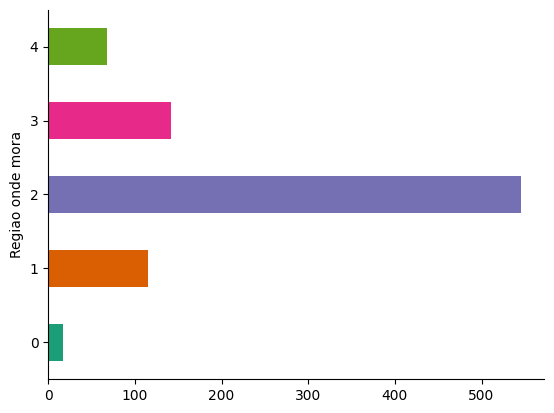

In [455]:
from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('Regiao onde mora').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

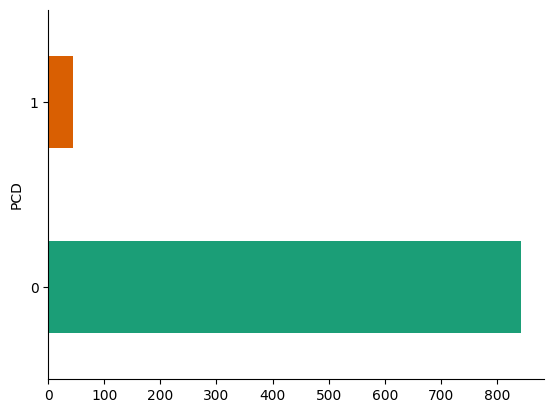

In [454]:
from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('PCD').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

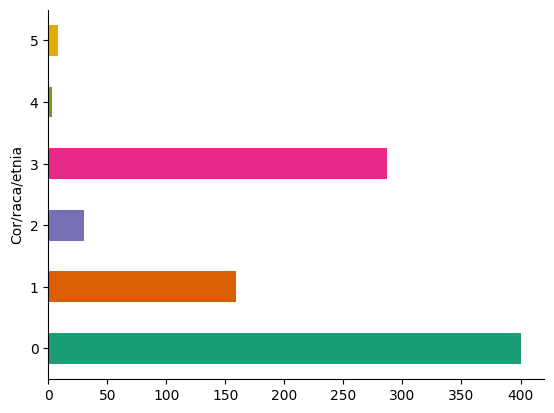

In [453]:
from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('Cor/raca/etnia').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

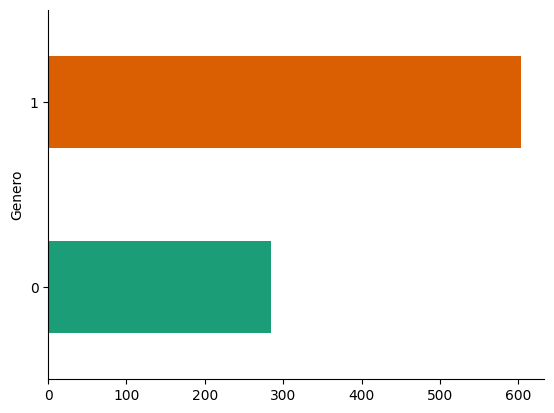

In [452]:
from matplotlib import pyplot as plt
import seaborn as sns
base.groupby('Genero').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

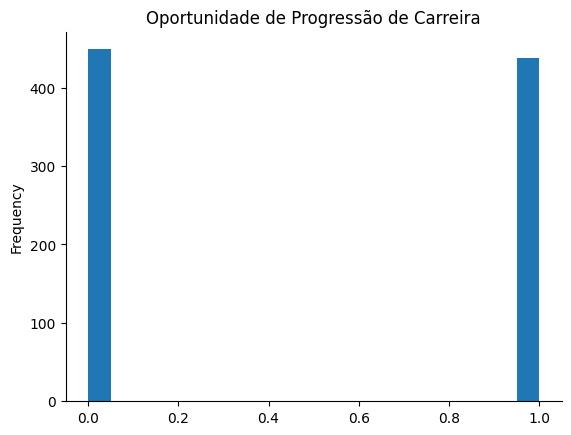

In [451]:
from matplotlib import pyplot as plt
base['Oportunidade de Progressão de Carreira'].plot(kind='hist', bins=20, title='Oportunidade de Progressão de Carreira')
plt.gca().spines[['top', 'right',]].set_visible(False)

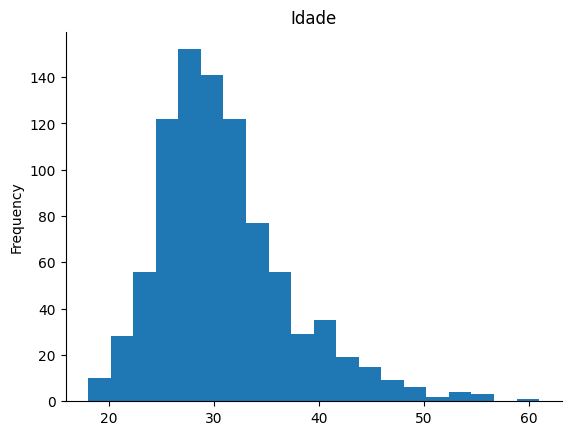

In [450]:
from matplotlib import pyplot as plt
base['Idade'].plot(kind='hist', bins=20, title='Idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

Arquivo

In [458]:
base.to_csv('dados_processados.csv', index=False)